In [13]:
import numpy as np
import matplotlib.pyplot as plt

## Métodos dos mínimos quadrados

In [14]:
#Criaremos duas features aleatorias
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

In [15]:
X_b = np.c_[np.ones((100,1)), X] #Adiciona x0 = 1 a cada instancia
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [16]:
theta_best

array([[3.64992609],
       [3.11050307]])

In [17]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] #Adiciona x0 =1 a cada instancia
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.64992609],
       [9.87093223]])

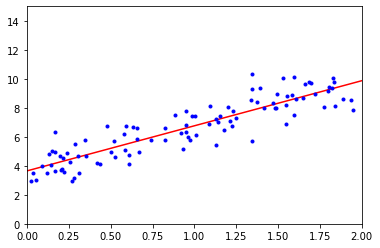

In [18]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

## Gradiente descendente em lote

In [19]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iterations in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [20]:
theta

array([[3.64992609],
       [3.11050307]])

## Gradiente descendente estocástico

In [21]:
n_epochs =  50
t0, t1 = 5, 10 #Hiperparametros do modelo

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2, 1) #inicialização aleatoria

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta)- yi)
    eta = learning_schedule(epoch * m + 1)
    theta = theta - eta * gradients

In [22]:
theta

array([[3.62679766],
       [3.08323859]])